# Tutorial of TaPiTas in pysda

In [1]:
import pysda
import os
import pandas as pd
import geopandas as gpd

### Use the build-in functions to read data (highly recommend).

In [2]:
#folder = r"D:\pySDA\test_data"
folder = r"/home/benny/Workspaces/pySDA/change1022/test_data"

#### Method 1: Load .csv

In [3]:
filename = "DengueKS2014.csv"
path = os.path.join(folder, filename)
crs="+init=epsg:4326"

pysda_data = pysda.data.readCSV(path, xtitle="X", ytitle="Y", ttitle="OnsetDay", crs=crs, tunit="day")

#### Method 2: Load DataFrame

In [4]:
filename = "DengueKS2014.csv"
path = os.path.join(folder, filename)
crs="+init=epsg:4326"
df = pd.read_csv(path, encoding="utf-8")

pysda_data = pysda.data.readDF(df, xtitle="X", ytitle="Y", ttitle="OnsetDay", crs=crs, tunit="day")

#### Method 3: Load .shp

In [5]:
filename = "DengueKS2014.shp"
path = os.path.join(folder, filename)

pysda_data = pysda.data.readSHP(path, ttitle="OnsetDay", tunit="day")

#### Method 4: Load geoDataFrame

In [6]:
filename = "DengueKS2014.shp"
path = os.path.join(folder, filename)
gdf = gpd.read_file(path, encoding="utf-8")

pysda_data = pysda.data.readGDF(gdf, ttitle="OnsetDay", tunit="day")

#### Arguments ~~explanition~~  <span style="color:red">explanation</span>:

1. **xtitle** is the name of the column which records the x coordinate of each point.
2. **ytitle** is the name of the column which records the y coordinate of each point.  
Note: The values of x and y must be **projected** coordinates rather than longitude and latitude.
3. **crs** is the Coordinate Reference System of the x and y.

4. **ttitle** is the name of the column which records the time of each point either in integer format or in date format. If its values are in integer format, pysda will directly use them as the time stamps; otherwise, pysda will firstly transform them into integer format (through *tunit* argument).

5. **tunit** is the temporal resolution for analysis, and the first time stamp is the first date in the input data. There are several choices:
    - int: assign that the ttitle column in the input data is integer format.
    - hour: 1 hour  
    - day: 1 days
    - week: 7 days
    - month: 30 days
    - year: 365 days
    - tunit also can be any string accepted by pandas' *date_range* function. For more details, please refer to https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases

***
***
### Initialize an instance

In [4]:
tpt = pysda.Tapitas(pysda_data)

### Set the parameters

parameters:
- s_radius: spatial search radius
- T1: the minimum value of the temporal search window.  
  If the $\Delta T \leq T1$ meaning that the relationship between the two events are neighboring pair 
- T2: the maximum value of the temporal search window.  
  If the $T1 < \Delta T \leq T2$ meaning that the relationshp between the two events are shifting link

For more details about the meanging of each parameter, please refer to the following documents:
- journal article: https://www.nature.com/articles/s41598-017-12852-z
- tapitas package: https://bitbucket.org/wcchin/tapitas/src

In [5]:
s_radius = 300
T1 = 6
T2 = 23

tpt.setParams(T1=T1, T2=T2, SR=s_radius, resample=9)

### Start running the algorithm

In [6]:
tpt.run()

construction of shifting graph - start
construction of shifting graph - stop
making links - start
find links - start
find links - stop
calculate passing possibility - start
calculate passing possibility - stop
calculate propensity - start
calculate propensity - stop
making links - stop
bootstraping - start
critical value is:  0.12924023944493063
bootstraping - stop
detection of subclusters - start
number of subcluster found: 112
calculation done
prepare results table
prepare result done


#### show the summary of the results
an overview of the results
- nodes: number of nodes
- npair: number of neighboring pair
- slink: number of shifting link
- sub-cluster: number of detected sub-cluster
- final_cpair: the cluster pair (neighboring pair with high probability to have the common origin)
- final_slink: the remaining shifting links

In [7]:
tpt.summary

,attribute
sub-cluster,112.00000
critical_value,0.12924
final_cpair,1865.00000
final_slink,1285.00000
nodes,1320.00000
npair,7257.00000
progressno,43.00000
slink,12948.00000


### Get all results

the getALL() function will return a dictionary, using these keys:
- nodes: a point geodataframe with all nodes inside, and which sub-cluster it belong to. 
- npairs: a line geodataframe recording all neighboring pairs (based on T1 and s_radius setting).
- slinks: a line geodataframe recording all shifting links indicating the transmission relationship.
- subclsuters: the detected sub-clusters, using the standard ellipse of the points to represent the location and direction. 
- prog_links: the connections between sub-clusters, which is consisted of one or more shifting links. 

In [11]:
result = tpt.getAll()
for key, value in result.items():
    print("Key is", key)
    #print(value.head(10))

Key is nodes
Key is slinks
Key is npairs
Key is subclusters
Key is prog_links


#### nodes
- node_id is same as the order of the input data
- xx: the x-coordinate of the point
- yy: the y-coordinate of the point
- time: the time column
- clid: the sub-cluster id the node belong to
- chid: the progression chain id the node belong to
- in_size: the number of shifting link that pointed to this node
- out_size: the number of shifting link that pointed outward from this node
- neig_size: the number of neighboring pair that connected with this node


In [12]:
result['nodes'].head(10)

,node_id,xx,yy,time,clid,chid,in_size,out_size,neig_size,geometry
0,0,179695.200767,2.497270e+06,2014/05/13-00:00:00,-1,NaN,0,3,1,POINT (179695.200766882 2497269.858528782)
1,1,179695.200767,2.497270e+06,2014/05/13-00:00:00,-1,NaN,0,3,1,POINT (179695.200766882 2497269.858528782)
2,2,180211.643507,2.497765e+06,2014/05/20-00:00:00,-1,NaN,0,16,2,POINT (180211.6435065586 2497764.701022268)
3,3,179695.200767,2.497270e+06,2014/05/22-00:00:00,0,-1.0,2,0,2,POINT (179695.200766882 2497269.858528782)
4,4,181420.648698,2.497000e+06,2014/05/22-00:00:00,-1,NaN,0,6,0,POINT (181420.6486981525 2496999.610708646)
5,5,180060.529509,2.497776e+06,2014/05/23-00:00:00,-1,NaN,0,18,2,POINT (180060.5295093319 2497776.462549706)
6,6,180317.340190,2.497715e+06,2014/05/24-00:00:00,-1,NaN,0,5,2,POINT (180317.3401900913 2497715.497319902)
7,7,179695.200767,2.497270e+06,2014/05/25-00:00:00,0,-1.0,2,0,2,POINT (179695.200766882 2497269.858528782)
8,8,179695.200767,2.497270e+06,2014/05/26-00:00:00,0,-1.0,2,0,2,POINT (179695.200766882 2497269.858528782)
9,9,177549.124107,2.497523e+06,2014/05/28-00:00:00,-1,NaN,0,0,0,POINT (177549.1241071712 2497523.457340129)


#### neighboring pairs
- n1_id / n2_id: the node_id of the two endpoints of the neighboring pair
- clid: the sub-cluster id the neighboring pair is in
- chid: the progression chain the neighboring pair is in
- max_cop: the max common origin prob.(COP) within the list of COP of all common origin between the two node
- n1x/n1y/n2x/n2y: the coordinates of the two nodes
- n1t/n2t: the time of the two node
- distance: the geographical distance between the two nodes
- timelag: the time difference between the two node


In [13]:
result['npairs'].head(5)

,n1_id,n2_id,clid,chid,max_cop,n1x,n1y,n2x,n2y,n1t,n2t,distance,timelag,geometry
0,3,7,0,-1,0.250000,179695.200767,2.497270e+06,179695.200767,2.497270e+06,2014/05/22-00:00:00,2014/05/25-00:00:00,0.000000,3,LINESTRING (179695.200766882 2497269.858528782...
1,3,8,0,-1,0.250000,179695.200767,2.497270e+06,179695.200767,2.497270e+06,2014/05/22-00:00:00,2014/05/26-00:00:00,0.000000,4,LINESTRING (179695.200766882 2497269.858528782...
2,7,8,0,-1,0.250000,179695.200767,2.497270e+06,179695.200767,2.497270e+06,2014/05/25-00:00:00,2014/05/26-00:00:00,0.000000,1,LINESTRING (179695.200766882 2497269.858528782...
3,10,11,1,0,0.399496,180118.534518,2.497868e+06,180060.529509,2.497776e+06,2014/05/31-00:00:00,2014/06/01-00:00:00,108.459745,1,LINESTRING (180118.5345183359 2497868.10825491...
4,10,13,1,0,0.179460,180118.534518,2.497868e+06,180000.459246,2.497909e+06,2014/05/31-00:00:00,2014/06/05-00:00:00,124.796460,5,LINESTRING (180118.5345183359 2497868.10825491...


#### shifting links
- ooid: the node id of the origin
- ddid: the node id of the destination
- clid: the sub-clsuter id of the destination point
- chid: the progression chain id of the destination point
- srisk: the spatial risk
- trisk: the temporal risk
- crisk: the combine risk
- opossi: the origin possibility
- oxcor / oycor: the coordinate of the origin point
- otime: the time of the origin point
- dxcor / dycor: the coordinate of the destination point
- dtime: the time of the destination point
- distance: the geographical distance between the two points
- timelag: the time differences between the two points

In [14]:
result['slinks'].head(5)

,ooid,ddid,clid,chid,srisk,trisk,crisk,opossi,oxcor,oycor,otime,dxcor,dycor,dtime,distance,timelag,geometry
0,11,47,1,0.0,0.244791,0.876032,0.214444,0.412321,180060.529509,2.497776e+06,2014/06/01-00:00:00,180211.643507,2.497765e+06,2014/06/17-00:00:00,151.571019,16,LINESTRING (180060.5295093319 2497776.46254970...
1,820,1116,65,-1.0,1.000000,0.168737,0.168737,0.295566,182245.094313,2.501114e+06,2014/08/16-00:00:00,182245.094313,2.501114e+06,2014/08/25-00:00:00,0.000000,9,LINESTRING (182245.0943129217 2501114.16939420...
2,209,442,12,4.0,0.700048,0.985402,0.689828,0.317771,181244.338495,2.502401e+06,2014/07/18-00:00:00,181239.417198,2.502450e+06,2014/08/01-00:00:00,48.993402,14,LINESTRING (181244.338494828 2502400.940853412...
3,300,617,-1,NaN,0.337719,0.876032,0.295852,0.257426,181255.234077,2.502309e+06,2014/07/25-00:00:00,181380.687601,2.502316e+06,2014/08/10-00:00:00,125.659322,16,LINESTRING (181255.2340772641 2502308.98168802...
4,575,1092,46,-1.0,0.254201,0.692362,0.175999,0.175145,182652.347040,2.501608e+06,2014/08/08-00:00:00,182685.882678,2.501753e+06,2014/08/25-00:00:00,148.744965,17,LINESTRING (182652.3470396374 2501608.46578799...


#### sub-clusters
- clid: sub-cluster id
- chid: progression chain id
- xx / yy: the mean center coordinate
- cls_size: number of point in this sub-cluster
- time_mdian: median time of the points in this sub-cluster
- time_start: the first point 
- time_stop: the last point
- behaviors: the sub-cluster behaviors
- in_count: the number of incoming sub-cluster (progression link)
- out_count: the number of outgoing sub-cluster (progression link)
- cls_area: the area of the standard ellipse of the sub-cluster

In [15]:
result['subclusters'].head(5)

,clid,chid,xx,yy,cls_size,time_mdian,time_start,time_stop,behaviors,in_count,out_count,geometry,cls_area
0,0,-1,179695.200767,2.497270e+06,3,2014/05/25-00:00:00,2014/05/22-00:00:00,2014/05/26-00:00:00,"['appearing', 'disappearing']",0,0,"POLYGON ((179696.0112203408 2497271.120735259,...",7.057234e+00
37,37,-1,184607.625146,2.496512e+06,4,2014/08/03-00:00:00,2014/08/02-00:00:00,2014/08/06-00:00:00,"['appearing', 'disappearing']",0,0,"POLYGON ((184607.6251457435 2496511.762124397,...",1.421085e-14
40,40,-1,178323.287580,2.508678e+06,2,2014/08/04-00:00:00,2014/08/03-00:00:00,2014/08/05-00:00:00,"['appearing', 'disappearing']",0,0,"POLYGON ((178324.0980335926 2508678.842451562,...",7.057234e+00
43,43,-1,176905.909885,2.504535e+06,2,2014/08/06-00:00:00,2014/08/05-00:00:00,2014/08/08-00:00:00,"['appearing', 'disappearing']",0,0,"POLYGON ((176906.7203385521 2504536.254855041,...",7.057234e+00
44,44,-1,182517.056325,2.503802e+06,2,2014/08/07-00:00:00,2014/08/05-00:00:00,2014/08/10-00:00:00,"['appearing', 'disappearing']",0,0,"POLYGON ((182517.0563254996 2503802.168012453,...",4.796163e-14


#### progression links
- id0: the sub-cluster id of the origin
- id1: the sub-cluster id of the destination
- clid: the sub-cluster id of the destination
- chid: the chain id
- size0: the number of node in the origin sub-cluster
- size1: the number of node in the destination sub-cluster
- x0/x1/y0/y1: the **mean center** coordinates of the origin(end with 0) and destination(end with 1) sub-clusters
- t0: the time of the first point in the origin sub-cluster
- t1: the time of the last point in destination sub-cluster
- op: origin possibility
- no_SL: the number of shifting links that connect from a node in origin sub-cluser to a node in the destination sub-cluster
- distance: the geographical distance between the **mean center** of the two sub-clusters
- timelag: the $t_1-t_0$

In [16]:
result['prog_links'].head(5)

,id0,id1,clid,chid,size0,size1,x0,x1,y0,y1,t0,t1,op,no_SL,distance,timelag,geometry
0,42,92,92,4,21,5,181462.146089,181697.496889,2.502283e+06,2.502447e+06,2014/08/05-00:00:00,2014/08/29-00:00:00,0.465578,7,286.805085,24,LINESTRING (181462.1460887853 2502283.05990330...
1,12,64,64,4,95,3,181207.254755,181383.949445,2.502474e+06,2.502585e+06,2014/07/14-00:00:00,2014/08/15-00:00:00,0.309481,3,208.866867,32,LINESTRING (181207.2547546971 2502473.86762932...
2,55,80,80,16,9,9,181071.921987,181186.817842,2.499393e+06,2.499283e+06,2014/08/08-00:00:00,2014/08/31-00:00:00,0.448296,13,159.332120,23,LINESTRING (181071.9219865342 2499393.41265436...
3,41,68,68,11,23,5,181265.985671,181106.644609,2.501089e+06,2.500861e+06,2014/08/04-00:00:00,2014/08/21-00:00:00,0.795686,7,278.489359,17,LINESTRING (181265.9856705102 2501088.96968905...
4,18,36,36,1,2,2,180628.914532,180664.139356,2.499531e+06,2.499589e+06,2014/07/19-00:00:00,2014/08/03-00:00:00,0.477339,2,68.312662,15,LINESTRING (180628.9145322346 2499530.69172823...


### Directly save the results to the perfered direction

In [17]:
tpt.saveAll(dirpath='temp', prefix='temp2_', to_csv=True, to_shp=True, zip_it=True)

### Save the figure 

use sns hls color list with 5 groups


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

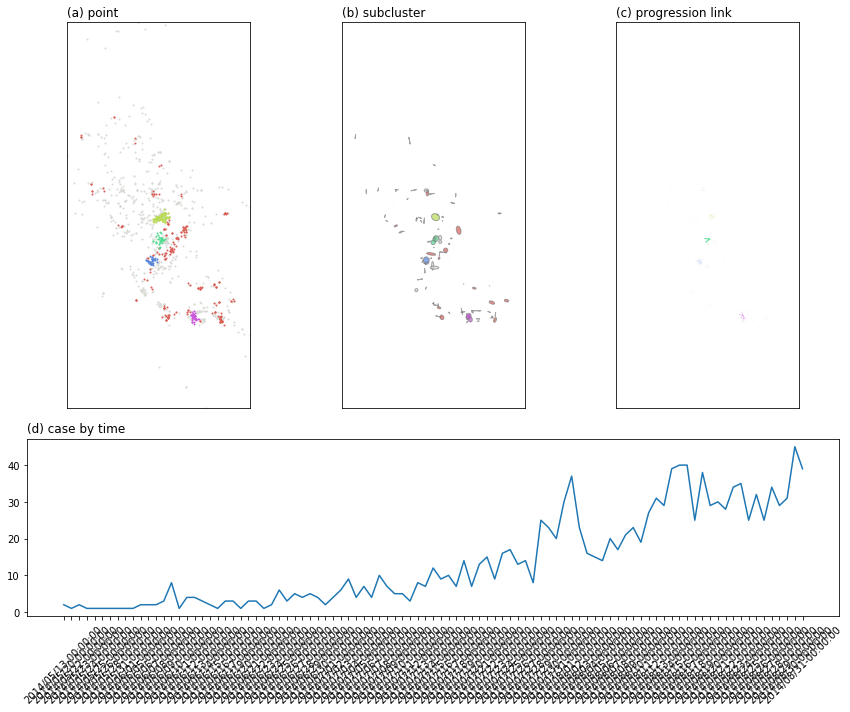

In [8]:
tpt.saveFigure(dirpath='temp', prefix='temp2_', vno=16, dev_scale=1.5)